# Population Growth

In [2]:
import numpy
import pandas

%matplotlib inline
%config InlineBackend.figure_format = "retina"

import modsim

In [5]:
filename = "https://en.wikipedia.org/wiki/Estimates_of_historical_world_population"
table2 = pandas.read_html(
    filename,
    header=0,
    index_col=0,
    decimal='M',
)[2]

table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

In [6]:
un = table2.un / 1e9
census = table2.census / 1e9

t_0 = census.index[0]
t_end = census.index[-1]
elapsed_time = t_end - t_0

p_0 = census[t_0]
p_end = census[t_end]

total_growth = p_end - p_0
annual_growth = total_growth / elapsed_time

In [13]:
system = modsim.System(
    t_0=t_0,
    t_end=t_end,
    p_0=p_0,
    annual_growth=annual_growth,
)

In [14]:
system

,values
t_0,1950.000000
t_end,2016.000000
p_0,2.557629
annual_growth,0.072248


In [20]:
def run_simulation1(system):
    results = modsim.TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in range(int(system.t_0), int(system.t_end)):
        results[t+1] = results[t] + system.annual_growth
    
    return results

In [21]:
results1 = run_simulation1(system)

In [22]:
def plot_estimates():
    census.plot(style=':', label='US Census')
    un.plot(style='--', label='UN DESA')
    modsim.decorate(xlabel='Year', 
             ylabel='World population (billion)') 

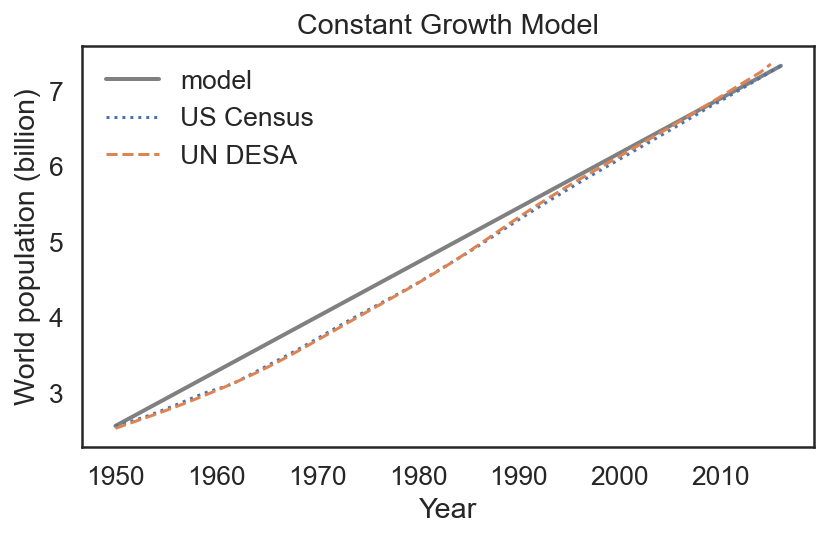

In [23]:
results1.plot(label='model', color='gray')
plot_estimates()
modsim.decorate(title='Constant Growth Model')

### Proportional Growth Model

In [24]:
def run_simulation2(system):
    results = modsim.TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in range(int(system.t_0), int(system.t_end)):
        births = system.birth_rate * results[t]
        deaths = system.death_rate * results[t]
        results[t+1] = results[t] + births - deaths
        
    return results

In [25]:
system.death_rate = 7.7 / 1000 # 7.7 deaths per 1000 people
system.birth_rate = 25 / 1000

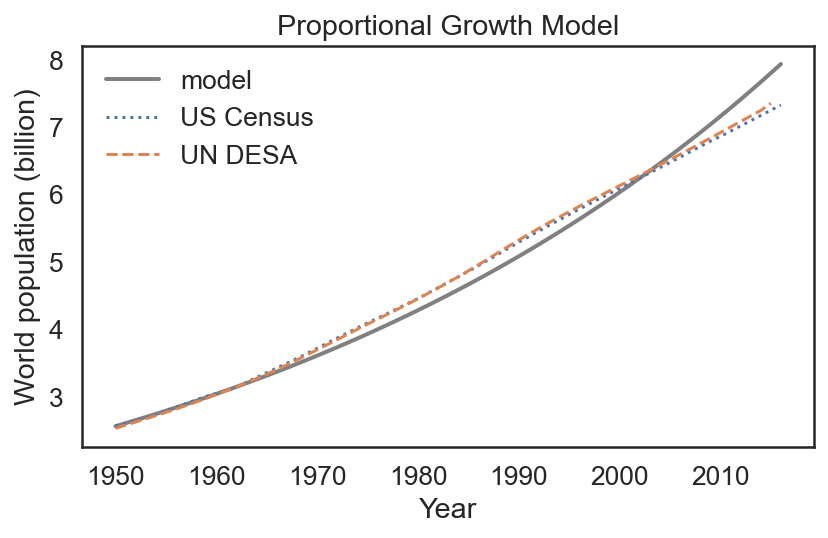

In [26]:
results2 = run_simulation2(system)
results2.plot(label='model', color='gray')
plot_estimates()
modsim.decorate(title='Proportional Growth Model')

In [27]:
def growth_func1(t, pop, system):
    births = system.birth_rate * pop
    deaths = system.death_rate * pop
    return births - deaths

In [32]:
def run_simulation(system, growth_func):
    results = modsim.TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in range(int(system.t_0), int(system.t_end)):
        growth = growth_func(t, results[t], system)
        results[t+1] = results[t] + growth
        
    return results

In [33]:
results = run_simulation(system, growth_func1)

### Combining Birth and Death

In [34]:
system.alpha = system.birth_rate - system.death_rate

In [35]:
def growth_func2(t, pop, system):
    return system.alpha * pop

In [36]:
results = run_simulation(system, growth_func2)

### Exercise 1

Maybe the reason the proportional model doesn’t work very well is that the growth rate, `alpha`, is changing over time. So let’s try a model with different growth rates before and after 1980 (as an arbitrary choice).

Write an update function that takes `t`, `pop`, and `system` as parameters. The system object, `system`, should contain two parameters: the growth rate before 1980, `alpha1`, and the growth rate after 1980, `alpha2`. It should use `t` to determine which growth rate to use.

Test your function by calling it directly, then pass it to `run_simulation`. Plot the results. Adjust the parameters `alpha1` and `alpha2` to fit the data as well as you can.

In [37]:
def growth_func3(t, pop, system, year_cut=1980):
    if t < year_cut:
        return system.alpha1 * pop
    else:
        return system.alpha2 * pop

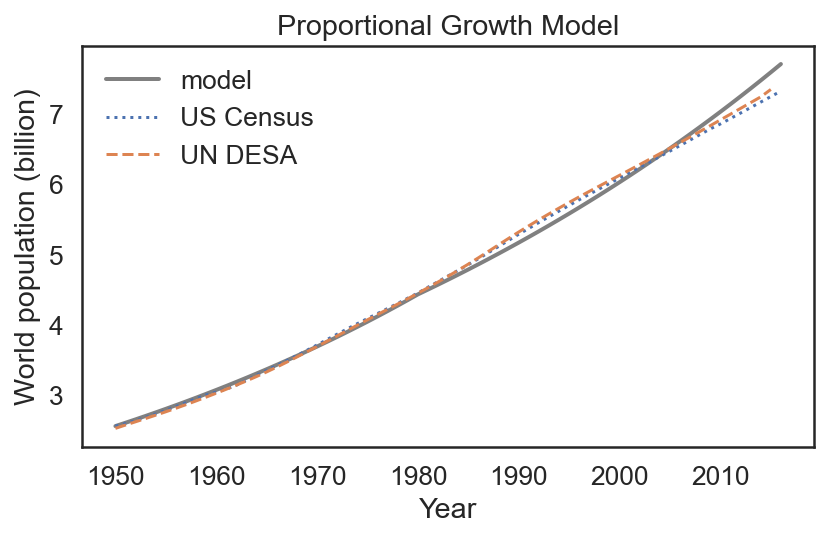

In [65]:
system3 = modsim.System(
    t_0=t_0,
    t_end=t_end,
    p_0=p_0,
    annual_growth=annual_growth,
    alpha1=0.0185,
    alpha2=0.0155,
)

results3 = run_simulation(system3, growth_func3)
results3.plot(label='model', color='gray')
plot_estimates()
modsim.decorate(title='Proportional Growth Model')